In [1]:
import numpy as np
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load the data and split it into separate pieces
data = pm.datasets.load_wineind()
train, test = model_selection.train_test_split(data, train_size=150)

In [3]:
train

array([15136., 16733., 20016., 17708., 18019., 19227., 22893., 23739.,
       21133., 22591., 26786., 29740., 15028., 17977., 20008., 21354.,
       19498., 22125., 25817., 28779., 20960., 22254., 27392., 29945.,
       16933., 17892., 20533., 23569., 22417., 22084., 26580., 27454.,
       24081., 23451., 28991., 31386., 16896., 20045., 23471., 21747.,
       25621., 23859., 25500., 30998., 24475., 23145., 29701., 34365.,
       17556., 22077., 25702., 22214., 26886., 23191., 27831., 35406.,
       23195., 25110., 30009., 36242., 18450., 21845., 26488., 22394.,
       28057., 25451., 24872., 33424., 24052., 28449., 33533., 37351.,
       19969., 21701., 26249., 24493., 24603., 26485., 30723., 34569.,
       26689., 26157., 32064., 38870., 21337., 19419., 23166., 28286.,
       24570., 24001., 33151., 24878., 26804., 28967., 33311., 40226.,
       20504., 23060., 23562., 27562., 23940., 24584., 34303., 25517.,
       23494., 29095., 32903., 34379., 16991., 21109., 23740., 25552.,
      

In [4]:
test

array([30345., 24488., 25156., 25650., 30923., 37240., 17466., 19463.,
       24352., 26805., 25236., 24735., 29356., 31234., 22724., 28496.,
       32857., 37198., 13652., 22784., 23565., 26323., 23779., 27549.,
       29660., 23356.])

In [8]:
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2915.641, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3049.597, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2954.973, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2947.014, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3047.612, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2938.457, Time=0.13 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2915.636, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2984.606, Time=0.06 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2915.168, Time=0.20 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2917.256, Time=0.25 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2924.379, Time=0.21 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=2911.007, Time=0.20 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2911.505, Time=0.11 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=2912.933, Time=0.21 sec
 ARIMA(2,1,1)(1,0,1

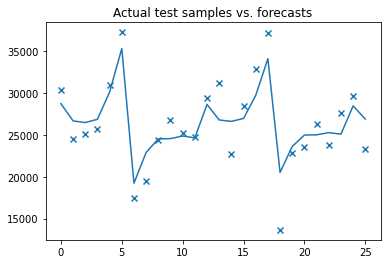

In [9]:
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [16]:
arima.predict(7)

array([28714.57302563, 26660.29939488, 26461.99816202, 26853.86561682,
       30106.10771458, 35296.28588513, 19232.51178748])